# Introduction to Polynomial Regression

Polynomial Regression is a form of linear regression where the relationship between the independent variable \(X\) and the dependent variable \(y\) is modeled as an \(n\)-degree polynomial. It allows us to model nonlinear relationships.

---

## Table of Contents

1. [Why Polynomial Regression?](#1-why-polynomial-regression)
2. [The Polynomial Regression Model](#2-the-polynomial-regression-model)
3. [Fitting a Polynomial Regression Model](#3-fitting-a-polynomial-regression-model)
4. [Visualizing Polynomial Regression](#4-visualizing-polynomial-regression)
5. [Evaluating the Model](#5-evaluating-the-model)

---

## 1. Why Polynomial Regression?

While simple linear regression assumes a linear relationship between the independent and dependent variables, real-world data is often nonlinear. Polynomial regression adds powers of the independent variables as new features, allowing us to capture complex relationships.

---

## 2. The Polynomial Regression Model

Polynomial regression fits a curve, instead of a straight line, to the data. The model for a polynomial regression of degree \(n\) looks like this:

\[ y = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_n X^n \]

Where:
- \( X \) is the feature,
- \( y \) is the target variable,
- \( \beta_0, \beta_1, \dots, \beta_n \) are the coefficients.

---

## 3. Fitting a Polynomial Regression Model

In Python, we can easily fit a polynomial regression model by using the `PolynomialFeatures` transformer from `scikit-learn` to generate polynomial features.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
import numpy as np

In [13]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 0.5 * X**2 + np.random.randn(100, 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly,y_train)

y_pred = model.predict(X_test_poly)

In [14]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [4.37728571]
Coefficients: [[0.         1.97600197 0.90586951]]


## 4. Visualizing Polynomial Regression


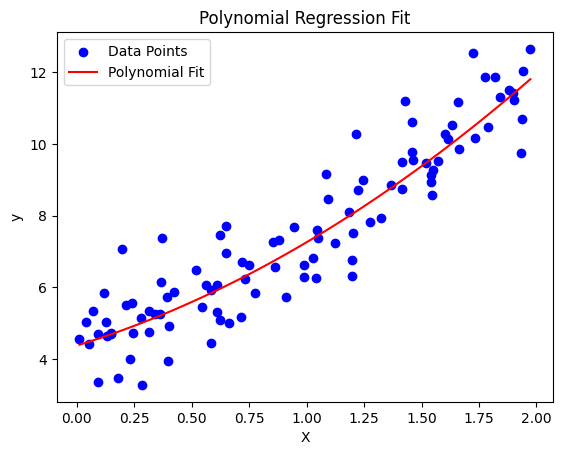

In [15]:
import matplotlib.pyplot as plt


X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_range = poly.transform(X_range)
y_range_pred = model.predict(X_poly_range)

plt.scatter(X, y, color='blue', label='Data Points')

plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')

plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## 5. Evaluating the Model
We can use common evaluation metrics such as the Mean Squared Error (MSE) and R-squared (R²) to assess the performance of our polynomial regression model.


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.5627058960640547
R-squared (R²): 0.918330562112422


- Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. Lower MSE indicates better fit.
- R-squared (R²): Indicates the proportion of variance in the dependent variable explained by the independent variable(s). Higher R² values (close to 1) indicate a better fit.